<a href="https://colab.research.google.com/github/wnyngj/class2022spring/blob/main/sound_processing0411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Signal Processing
> sampling rate(Hz), frequency(Hz), phasor

- digital = sampling, *quantize*

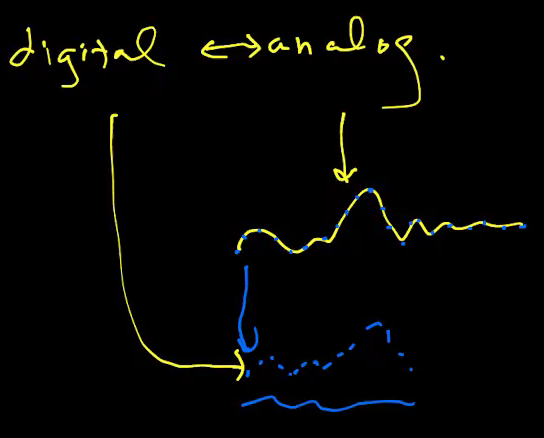

-sampling rate = 100hz : 1초를 100등분한다, 

초당 몇개의 값이 있는가
ex. 10000Hz, 1.5초 = 15000개의 값

-frequency = 7Hz : 초당 몇번의 반복이 있는가

-phasor = 주어진 조건(smplng rte,frqncy,ampltde,drtion)에 따라 사인 곡선을 만들어내는 것

fourier : 모든 signal은 여러가지 다양한 sine 곡선들의 결합으로 이루어져 있다

그래서 사인 곡선을 만드는 것은 중요함


signal = 시간의 함수

DSP = s를 d의 관점에서 p하는 것


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

### Phasor (sine)

In [3]:
# parameter setting
amp = 1          # range [0.0, 1.0] #진폭
sr = 10000       # sampling rate, Hz  #1초에 몇 개의 숫자
dur = 0.5        # in seconds   #signal 얼만큼 긴가
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian  #시작하는 지점(이동하는 것에 따라 sine곡선 잘리겠지)

In [4]:
# generate sample ticks
#샘플틱
nSamp = sr * dur
samples = np.arange(1, nSamp+1)
#Q.샘플의 length 5000개

In [5]:
# convert sample to time (sec)
#샘플틱 -> 타임틱
t = samples/sr  #1/10000, 2/10000, ...5000/10000
#Q. convert가 되었더라도 개수는 똑같이 5000개

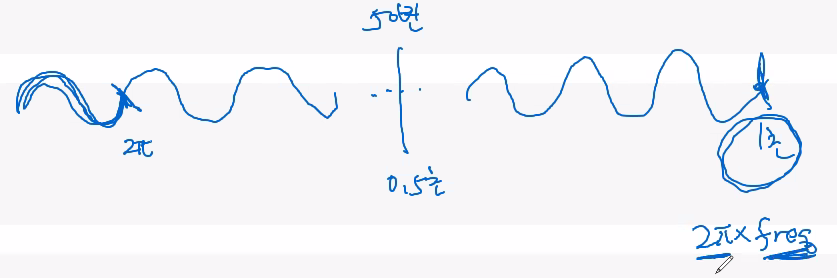

In [6]:
# convert time to angle (radian)
#사인 x축은 radian으로 들어가야 함
#타임틱 -> 앵글틱
#1초에 100번의 사인곡선이 있고, 0.5초까진 50개의 사인곡선이 있음
theta0 = t * 2*np.pi * freq

In [7]:
# shift angle by phase
theta = theta0 + phase

In [9]:
# generate signal by sin-phasor
s = amp * np.sin(theta)
#amp=1 범위가 -1~1(if amp=2, 범위가 -2~2)

Text(0, 0.5, 'real')

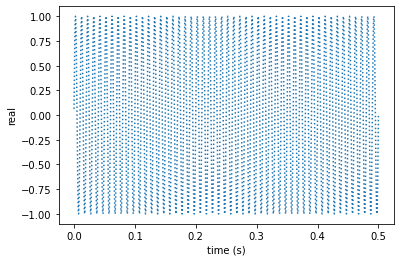

In [11]:
# plot the entire signal
plt.plot(t, s, ':')   #(x,y,표현형태) (theta,s)도 가능, 그럼 한번의 sine곡선에 2파이
plt.xlabel('time (s)')
plt.ylabel('real')
# 총 5000개의 점

Text(0, 0.5, 'real')

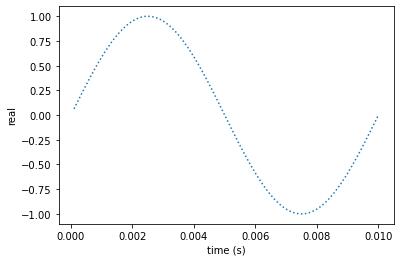

In [12]:
# plot a certain portion of signals
sampleRng = np.arange(0,100)
plt.plot(t[sampleRng], s[sampleRng], ':')
plt.xlabel('time (s)')
plt.ylabel('real')

In [13]:
ipd.Audio(s, rate=10000)
#input= signal의 s
#output= samplingrate, rate=sr도 ok 

#frequency를 200HZ하면 옥타브가 올라감

function화 하기

sine곡선으로 phasor만들기

In [14]:
def phasor_sine(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  s = amp * np.sin(theta)
  return s, t, theta

In [ ]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0   #입력값
s, t, theta = phasor_sine(amp, sr, dur, freq, phase)
ipd.Audio(s, rate=sr)

### Phasor (complex)

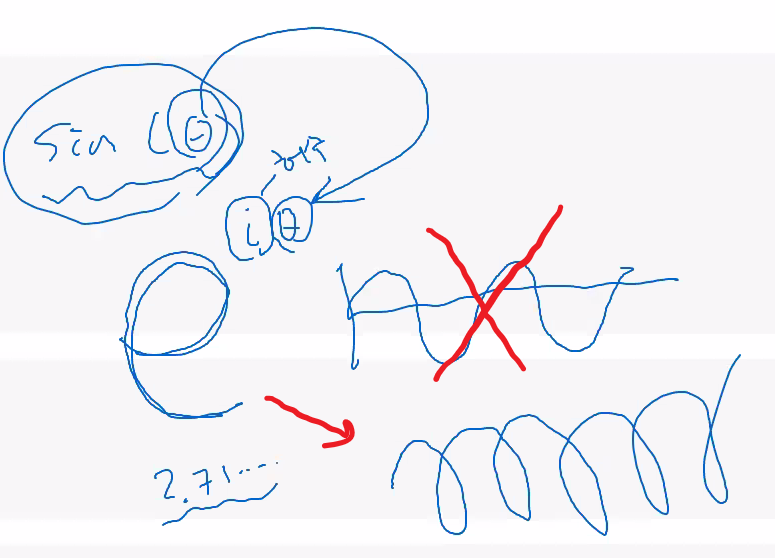

In [15]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz
phase = 0  # phase, radian

In [16]:
# generate samples
nSamp = sr * dur
samples = np.arange(1, nSamp+1)

In [17]:
# convert samples to time
t = samples/sr

In [18]:
# convert time to angle in radian
theta0 = t * 2*np.pi * freq

In [19]:
# shift angle by phase
theta = theta0 + phase

In [23]:
# generate signal by complex-phasor (sin과 cos둘다 있으므로 complex)
c = amp * np.exp(theta*1j)
#사인대신 np.exp, 1j= 2.71..이라는 e의 thetaj승

In [ ]:
# plot the entire signal
import plotly.graph_objects as go
x, y, z = t, c.real, c.imag
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()
#e의 앵글j승 -> 복소수 a+bi를 만들어냄
#x축 실수(real)축, y축 허수(imaginary)축으로 하는 좌표에 (a,b)찍을 수 있음

#real<->time = cos곡선, imaginary<->time = sine곡선

In [ ]:
# plot a certain of signals
import plotly.graph_objects as go
sampleRng = np.arange(0,100)
x, y, z = t[sampleRng], c.real[sampleRng], c.imag[sampleRng]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.update_layout(scene = dict(
                    xaxis_title='time (sec)',
                    yaxis_title='real',
                    zaxis_title='imag'))
fig.show()

In [26]:
ipd.Audio(c.imag, rate=sr)  #real파트만 하고 imaginary파트는 버린 cos function소리

In [27]:
def phasor_complex(amp, sr, dur, freq, phase):
  t = np.arange(1, sr * dur+1)/sr
  theta = t * 2*np.pi * freq + phase
  c = amp * np.exp(theta*1j)
  return c, t, theta

In [28]:
amp = 1; sr = 10000; dur = 1; freq = 440; phase = 0
c, t, theta = phasor_complex(amp, sr, dur, freq, phase)
ipd.Audio(c.imag, rate=sr)
#c.imag가 아니라 c.real로 하든 phasor를 shift시키든 청각적으로 소리는 비슷함